In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

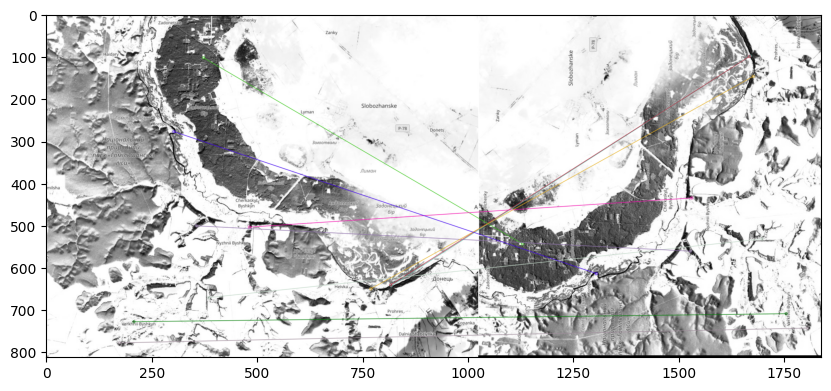

(<matplotlib.image.AxesImage at 0x2319f71f310>, None)

In [22]:
# Test ORB rotated pictures
img1 = cv2.imread('test_data/gomil_winter.JPG', cv2.IMREAD_GRAYSCALE)          # queryImage infrared
img2 = cv2.imread('test_data/gomil_winter_rot.JPG', cv2.IMREAD_GRAYSCALE)      # trainImage infrared
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], None, flags=2)
plt.figure(figsize=(10,6))
plt.imshow(img3, cmap="gray"), plt.show()

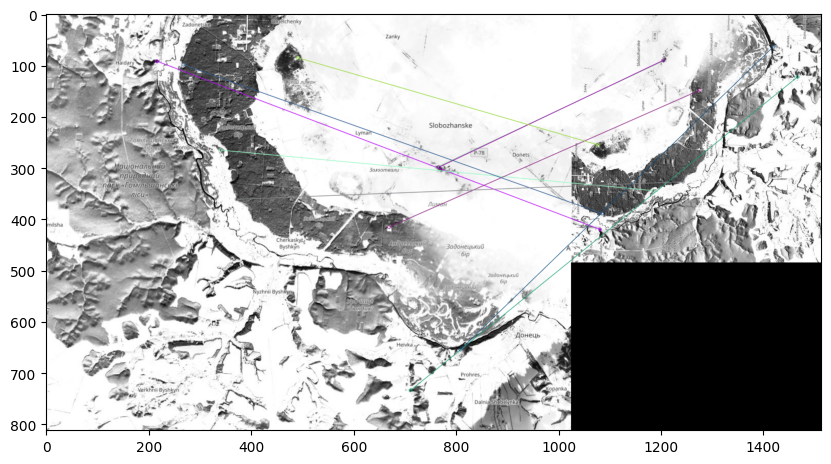

(<matplotlib.image.AxesImage at 0x2319f1c38e0>, None)

In [24]:
# Test ORB rotated and scaled pictures
img1 = cv2.imread('test_data/gomil_winter.JPG', cv2.IMREAD_GRAYSCALE)          # queryImage infrared
img2 = cv2.imread('test_data/gomil_winter_rot_sc.jpg', cv2.IMREAD_GRAYSCALE)      # trainImage infrared
# Initiate ORB detector
orb = cv2.ORB_create()
# Find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], None, flags=2)
plt.figure(figsize=(10,6))
plt.imshow(img3, cmap="gray"), plt.show()

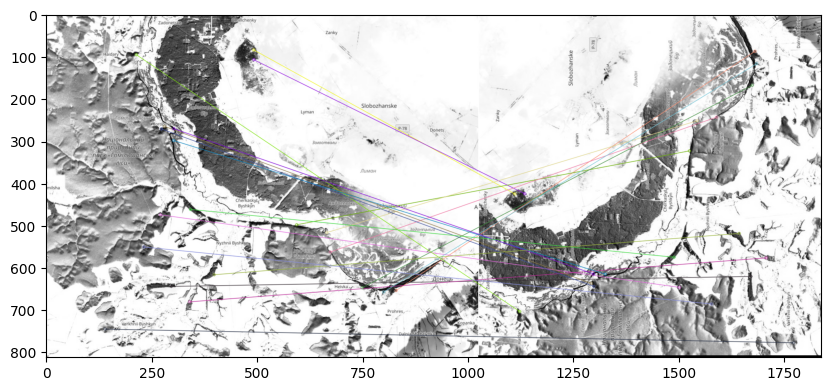

(<matplotlib.image.AxesImage at 0x231a01b2500>, None)

In [26]:
# Test SIFT rotated pictures
img1 = cv2.imread('test_data/gomil_winter.JPG', cv2.IMREAD_GRAYSCALE)          # queryImage infrared
img2 = cv2.imread('test_data/gomil_winter_rot.JPG', cv2.IMREAD_GRAYSCALE)      # trainImage infrared
# Initiate SIFT detector
sift = cv2.SIFT_create()
# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []
matches = sorted(matches, key=lambda x: x[0].distance)
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:20], None, flags=2)
plt.figure(figsize=(10,6))
plt.imshow(img3),plt.show()


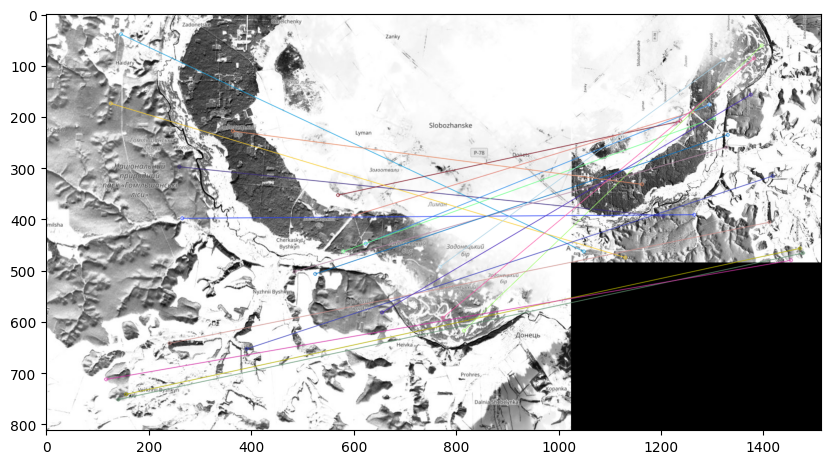

(<matplotlib.image.AxesImage at 0x231a0122830>, None)

In [27]:
# Test SIFT rotated pictures
img1 = cv2.imread('test_data/gomil_winter.JPG', cv2.IMREAD_GRAYSCALE)          # queryImage infrared
img2 = cv2.imread('test_data/gomil_winter_rot_sc.jpg', cv2.IMREAD_GRAYSCALE)      # trainImage infrared
# Initiate SIFT detector
sift = cv2.SIFT_create()
# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []
matches = sorted(matches, key=lambda x: x[0].distance)
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:20], None, flags=2)
plt.figure(figsize=(10,6))
plt.imshow(img3),plt.show()

In [7]:
# Path to loaded data. Choose B8A chanal because it was more stable and did not depend on the season
path_img1 = "test_data/S2A_MSIL1C_20180611T083601_N0206_R064_T36UYA_20180611T104008.SAFE/GRANULE/L1C_T36UYA_A015505_20180611T084243/IMG_DATA/T36UYA_20180611T083601_B8A.jp2"
path_img2 = "test_data/S2A_MSIL1C_20180611T083601_N0206_R064_T37UCR_20180611T104008.SAFE/GRANULE/L1C_T37UCR_A015505_20180611T084243/IMG_DATA/T37UCR_20180611T083601_B8A.jp2"

In [50]:
# Read image. 
img1 = cv2.imread(path_img1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path_img2, cv2.IMREAD_GRAYSCALE)

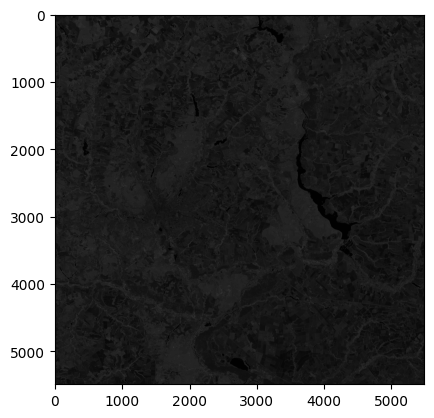

(<matplotlib.image.AxesImage at 0x131bd64f940>, None)

In [59]:
plt.imshow(img1, cmap="gray"),plt.show()

In [54]:
# Find the keypoints and descriptors with SIFT. Choose SIFT because it better with different light gradient
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


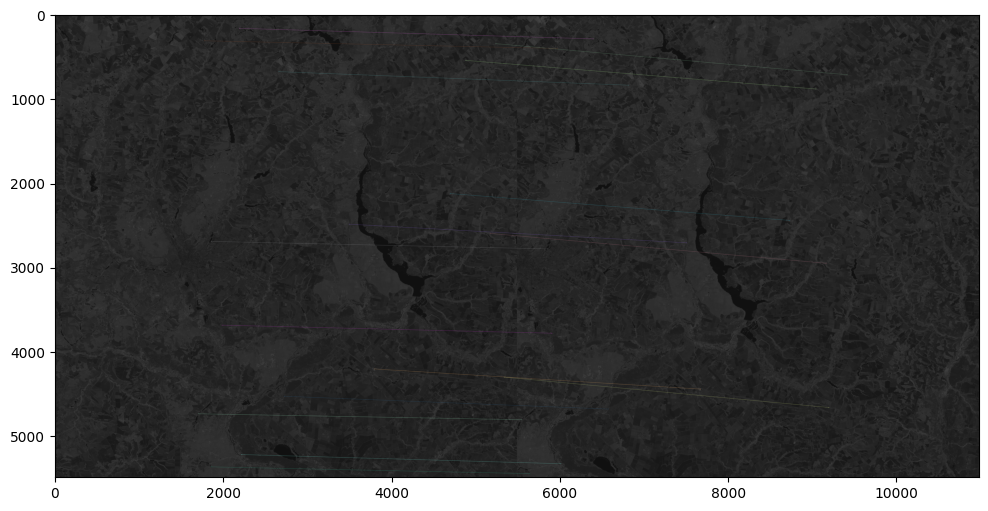

(<matplotlib.image.AxesImage at 0x131c5feffd0>, None)

In [58]:
# BFMatcher with default params
bf = cv2.BFMatcher()
# Apply ratio test
matches = bf.knnMatch(des1, des2, k=2)
matches = sorted(matches, key=lambda x: x[0].distance)
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:20], None, flags=2)
# Create negative picture and increase contrast
negative_image = 255 - img3
min_val = np.min(negative_image)
max_val = np.max(negative_image)
img_contrast = 255 * (negative_image - min_val) / (max_val - min_val)
plt.figure(figsize=(12,6))
plt.imshow(img_contrast),plt.show()

In [53]:
# Save results
for match in good[:20]:
    m = match[0]
    pt1 = (int(kp1[m.queryIdx].pt[0]), int(kp1[m.queryIdx].pt[1]))
    pt2 = (int(kp2[m.trainIdx].pt[0] + img1.shape[1]), int(kp2[m.trainIdx].pt[1]))
    img3 = cv2.line(img3, pt1, pt2, (0, 255, 0), 2)
cv2.imwrite('output_image.jpg', img3)

True